# A/B Testing

## Running Example

A classical use-case of A/B tesing is optimizing the click through rate of a e-commerse website
given different layout designs.

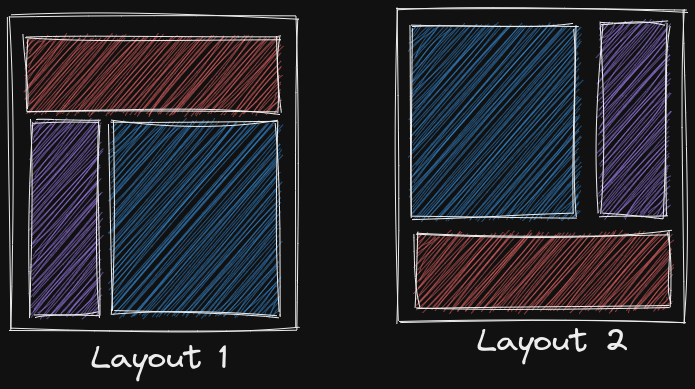

Some common questions we want to answer:
- which layout is better ?
- how many data should we collect ?
- how much better ?

## Generated Data

Assuming layout 2 is better and we generate data according to this assumption. Let's try to analyze the generated data to recover our assumption.

In [80]:
from scipy.stats import bernoulli

size_1 = 100
size_2 = 100

# the "true" CTR of both layouts
p_1 = 0.7
p_2 = 0.9

population_1 = bernoulli.rvs(p_1, size=size_1)
population_2 = bernoulli.rvs(p_2, size=size_2)

## Bayesian Analysis

Let's model the CTR as a beta distribution since it is always between 0 and 1, and assume we know nothing about how the CTR look like and hence uniformly distributed across the interval [0,1]

In [92]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

az.style.use("fivethirtyeight")

In [81]:
with pm.Model() as model:
    ctr1 = pm.Beta("ctr1", alpha=1, beta=1)
    ctr2 = pm.Beta("ctr2", alpha=1, beta=1)
    click1 = pm.Binomial("click1", p=ctr1, n=size_1, observed=sum(population_1))
    click2 = pm.Binomial("click2", p=ctr2, n=size_2, observed=sum(population_2))
    diff = pm.Deterministic("diff", ctr2-ctr1)
    t = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ctr1, ctr2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Text(0.5, 1.0, 'Click Trough Rate (Layout 2)')

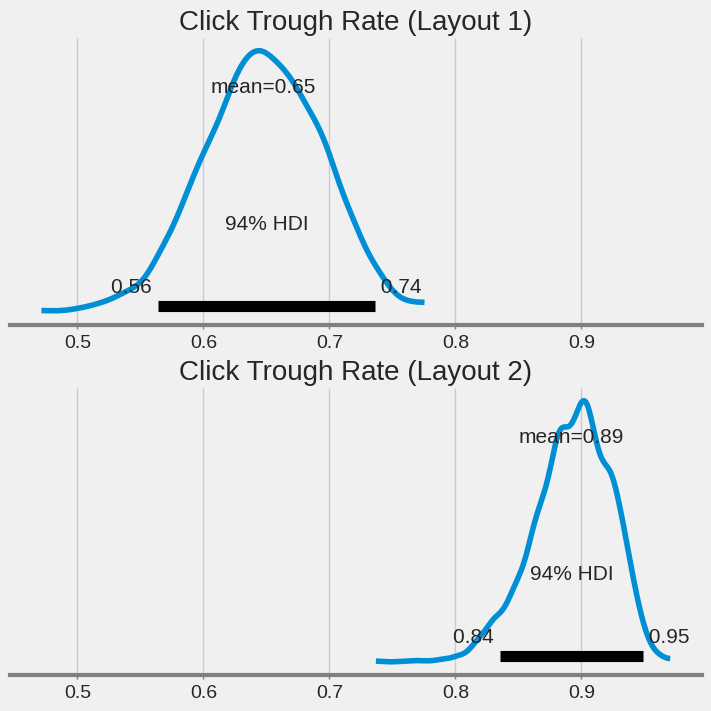

In [99]:
fig, axs = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
az.plot_posterior(t.posterior["ctr1"], ax=axs[0])
axs[0].set_title("Click Trough Rate (Layout 1)", fontsize=20)
az.plot_posterior(t.posterior["ctr2"], ax=axs[1])
axs[1].set_title(C)

Text(0.5, 1.0, 'Difference between CTR')

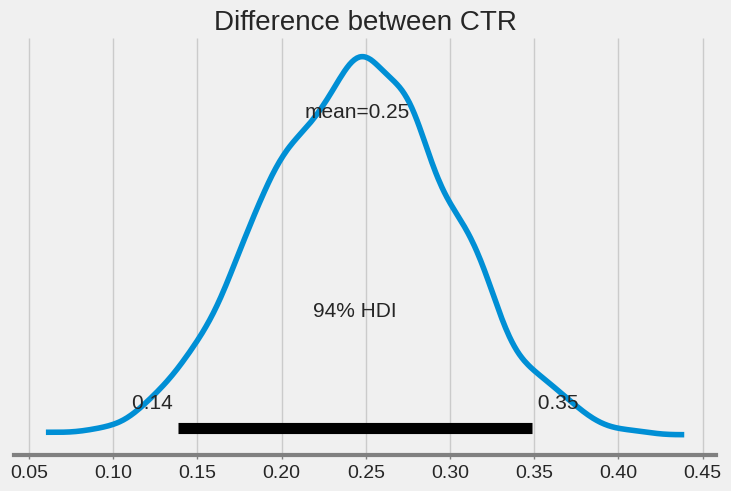

In [101]:
az.plot_posterior(t, var_names=["diff"])
plt.title("Difference between CTR", fontsize=20)